In [6]:
%run ../00_AdvancedPythonConcepts/talktools.py

# xarray

<img src="http://xarray.pydata.org/en/stable/_images/dataset-diagram-logo.png">

Adding dimensions names and coordinate indexes to numpy’s ndarray makes many powerful array operations possible:

- Apply operations over dimensions by name: `x.sum('time')`.
- Select values by label instead of integer location: `x.loc['2014-01-01']` or `x.sel(time='2014-01-01')`.
- Mathematical operations (e.g., `x - y`) vectorize across multiple dimensions (array broadcasting) based on dimension names, not shape.
- Flexible split-apply-combine operations with groupby: `x.groupby('time.dayofyear').mean()`.
- Database like alignment based on coordinate labels that smoothly handles missing values: `x, y = xr.align(x, y, join='outer')`.
- Keep track of arbitrary metadata in the form of a Python dictionary: x.attrs.

Works with dask too.

- **DataArray**: labeled, N-dimensional array. It is an N-D generalization of a pandas.Series. 

- **Dataset** multi-dimensional, in-memory array database. It is a dict-like container of DataArray objects aligned along any number of shared dimensions, and serves a similar purpose in xarray to the pandas.DataFrame

http://xarray.pydata.org/en/stable/why-xarray.html#features

In [47]:
!conda install xarray netCDF4 -y

Fetching package metadata .......
Solving package specifications: ..........

Package plan for installation in environment /Users/jbloom/anaconda/envs/seminar:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    curl-7.49.0                |                1         493 KB
    hdf4-4.2.12                |                0         642 KB
    libnetcdf-4.4.1            |                0         868 KB
    netcdf4-1.2.4              |      np111py35_1         468 KB
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    curl:      7.49.0-1         
    hdf4:      4.2.12-0         
    libnetcdf: 4.4.1-0          
    netcdf4:   1.2.4-np111py35_1

Fetching packages ...
curl-7.49.0-1. 100% |################################| Time: 0:00:01 466.94 kB/s
hdf4-4.2.12-0. 100% |

In [1]:
import xarray as xr
import numpy as np

In [9]:
xr.DataArray(np.random.randn(2, 3))

<xarray.DataArray (dim_0: 2, dim_1: 3)>
array([[ 1.01537573,  0.01168896,  0.78007355],
       [-1.73500021,  0.77996352, -2.21625093]])
Coordinates:
  * dim_0    (dim_0) int64 0 1
  * dim_1    (dim_1) int64 0 1 2

In [11]:
data = xr.DataArray(np.random.randn(2, 3), [('x', ['a', 'b']), ('y', [-2, 0, 2])])
data

<xarray.DataArray (x: 2, y: 3)>
array([[ 1.20375106, -0.24404385, -0.86667673],
       [-0.20140078,  0.12130626,  0.82867523]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 -2 0 2

In [12]:
data.dims

('x', 'y')

In [13]:
data.values

array([[ 1.20375106, -0.24404385, -0.86667673],
       [-0.20140078,  0.12130626,  0.82867523]])

In [14]:
data.attrs

OrderedDict()

In [18]:
# positional and by integer label, like numpy
data[[0]]

<xarray.DataArray (x: 1, y: 3)>
array([[ 1.20375106, -0.24404385, -0.86667673]])
Coordinates:
  * x        (x) <U1 'a'
  * y        (y) int64 -2 0 2

In [19]:
# by dimension name and coordinate label
data.sel(x=['a'])

<xarray.DataArray (x: 1, y: 3)>
array([[ 1.20375106, -0.24404385, -0.86667673]])
Coordinates:
  * x        (x) <U1 'a'
  * y        (y) int64 -2 0 2

In [20]:
data.mean(dim='x')

<xarray.DataArray (y: 3)>
array([ 0.50117514, -0.06136879, -0.01900075])
Coordinates:
  * y        (y) int64 -2 0 2

In [29]:
ds = data.to_dataset(name="mydata")

In [31]:
ds.to_netcdf("/tmp/data.nc")

In [35]:
ds1 = xr.open_dataset("/tmp/data.nc")

In [42]:
ds1.sel(y=[0])

<xarray.Dataset>
Dimensions:  (x: 2, y: 1)
Coordinates:
  * y        (y) int32 0
  * x        (x) |S1 b'a' b'b'
Data variables:
    mydata   (x, y) float64 -0.244 0.1213

## OPeNDAP

`xarray` includes support for OPeNDAP (via the netCDF4 library or Pydap), which lets us access large datasets over HTTP.

In [3]:
remote_data = xr.open_dataset(
     'http://iridl.ldeo.columbia.edu/SOURCES/.OSU/.PRISM/.monthly/dods',
     decode_times=False)

In [4]:
remote_data

<xarray.Dataset>
Dimensions:  (T: 1422, X: 1405, Y: 621)
Coordinates:
  * X        (X) float32 -125.0 -124.958 -124.917 -124.875 -124.833 -124.792 ...
  * T        (T) float32 -779.5 -778.5 -777.5 -776.5 -775.5 -774.5 -773.5 ...
  * Y        (Y) float32 49.9167 49.875 49.8333 49.7917 49.75 49.7083 ...
Data variables:
    ppt      (T, Y, X) float64 ...
    tdmean   (T, Y, X) float64 ...
    tmax     (T, Y, X) float64 ...
    tmin     (T, Y, X) float64 ...
Attributes:
    Conventions: IRIDL
    expires: 1375315200

In [5]:
tmax = remote_data['tmax'][:500, ::3, ::3]

In [6]:
tmax

<xarray.DataArray 'tmax' (T: 500, Y: 207, X: 469)>
[48541500 values with dtype=float64]
Coordinates:
  * X        (X) float32 -125.0 -124.875 -124.75 -124.625 -124.5 -124.375 ...
  * T        (T) float32 -779.5 -778.5 -777.5 -776.5 -775.5 -774.5 -773.5 ...
  * Y        (Y) float32 49.9167 49.7917 49.6667 49.5417 49.4167 49.2917 ...
Attributes:
    pointwidth: 120
    standard_name: air_temperature
    units: Celsius_scale
    expires: 1375315200

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

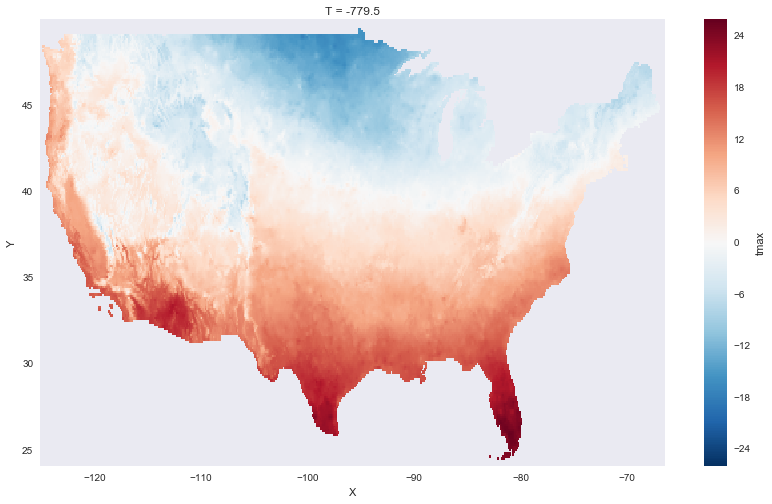

In [13]:
plt.figure(figsize=(14,8))
tmax[0].plot()